In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**1. Data Understanding and Preprocessing**

Check if any of the feature variables have null values and drop all null values

In [5]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
boston = boston.dropna()
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


There are no null-values in the boston data-set.

**1.1. Data Visualization**

Create a histogram of the boston data-set

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


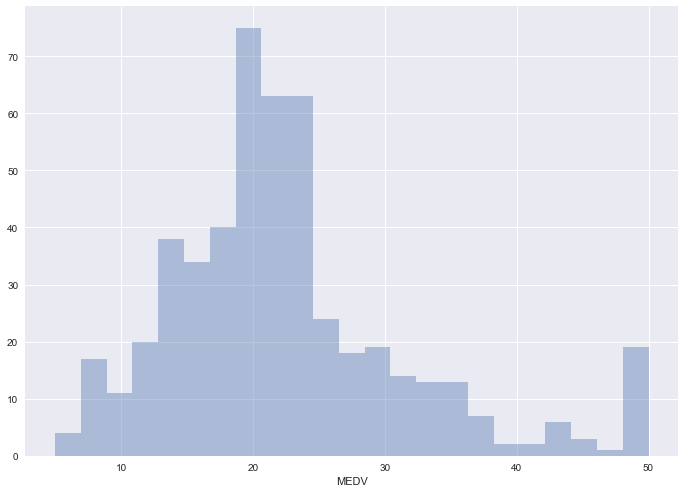

In [13]:
sns.distplot(boston['MEDV'],kde = False)
plt.show()

**1.2. Correlation Matrix**

First, compute the pairwise correlation for all the columns.

In [45]:
boston_corr = boston.corr(method='pearson')
boston_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

Next, use heatmap() to plot the correlation matrix.

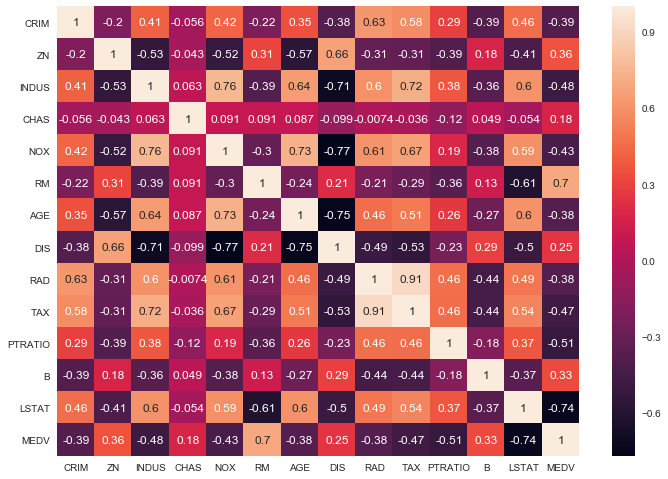

In [46]:
# Draw a very basic heatmap of the boston correlated matrix.
sns.heatmap(boston_corr, annot=True)

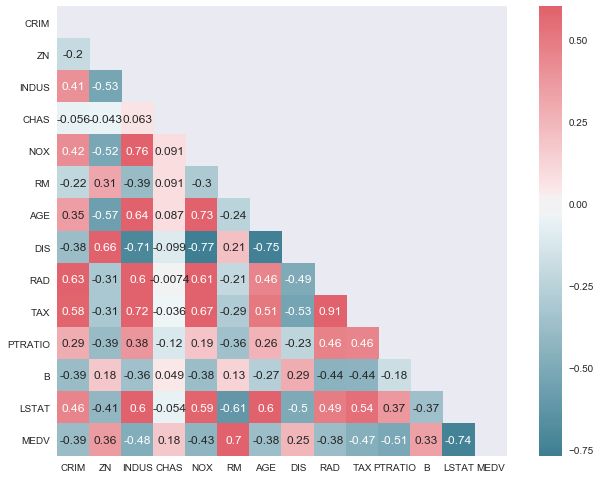

In [54]:
# Draw a heatmap of a diagonalized version of the boston correlated matrix.
mask = np.zeros_like(boston_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(boston_corr, mask=mask, cmap=cmap, annot=True, vmax=.6, center=0, square=True)

*Observations:*
If we consider 0.60 to be the minimum correlation value needed for two variables to be considered in somewhat of a relationship and -0.60 to be the maximum correlation value needed for two variables to be considered in somewhat of an inverse relationship, we can tell that the following variables have some sort of a relation with each other:

    > CRIM has correlation with RAD.
    > ZN has correlation with DIS.
    > INDUS has correlation with LSTAT, TAX, RAD, AGE, and NOX.
    > INDUS has an inverse relation with DIS.
    > NOX has correlation with TAX, RAD, AGE, and INDUS.
    > NOX has an inverse relation with DIS.
    > RM has correlation with MEDV.
    > RM has an inverse relation with LSTAT.
    > AGE has correlation with LSTAT, INDUS, and NOX.
    > AGE has an inverse relation with DIS.
    > DIS has correlation with ZN.
    > DIS has an inverse relation with INDUS, NOX, and AGE.
    > RAD has correlation with TAX, CRIM, INDUS, and NOX.
    > TAX has correlation with INDUS, NOX, and RAD.
    > LSTAT has correlation with INDUS and AGE.
    > LSTAT has an inverse relation with MEDV and RM.
    > MEDV has correlation with RM.
    > MEDV has an inverse relation with LSTAT.
    > LSTAT has an inverse relation with MEDV.

Other important notes about the heatmap and the correlation matrix are:

    > The greatest correlation coefficient of any relation (disregarding an integer's sign) is given from the relation of
      RAD and TAX.
    > The only variables that have no relations of any kind are CHAS, PTRATIO, and B.
    > Variables with three or more relations of any kind are more inclined to be related, somehow, with other variables
      with three or more relations. These variables are INDUS, TAX, RAD, AGE, AND NOX.

**Confirmation of Correlation**

Show correlations using the median value and the INDUS, NOX, and TAX variables.

In [94]:
boston_median = np.median(boston['INDUS'])
boston_median

9.69

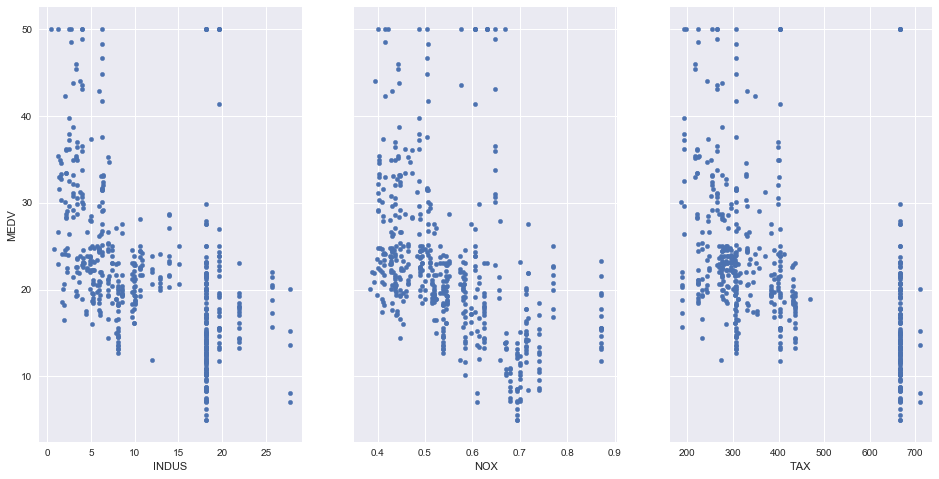

In [89]:
fig, axs = plt.subplots(1, 3, sharey=True)
boston.plot(kind='scatter', x='INDUS', y='MEDV', ax=axs[0], figsize=(16, 8))
boston.plot(kind='scatter', x='NOX', y='MEDV', ax=axs[1])
boston.plot(kind='scatter', x='TAX', y='MEDV', ax=axs[2])

**2. Basic Linear Regression**

Prep the data for training.

In [93]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='MEDV ~ INDUS', data=boston).fit()
lm2 = smf.ols(formula='MEDV ~ NOX', data=boston).fit()
lm3 = smf.ols(formula='MEDV ~ TAX', data=boston).fit()

print(lm1.params,'\n')
print(lm2.params,'\n')
print(lm3.params)

Intercept    29.754897
INDUS        -0.648490
dtype: float64 

Intercept    41.345874
NOX         -33.916055
dtype: float64 

Intercept    32.970654
TAX          -0.025568
dtype: float64


**Create Validation Data**

Split the boston dataset into the training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

